# Homework 5

## Problem 1

Use the $\texttt{Interpolations.jl}$ package to find three piecewise cubic spline interpolants to Runge's function, <p>
    
$$f(x) = \frac{1}{1+x^2}$$

on the interval $[-5, 5]$.  Use 20, 100, and 500 intervals for your interpolants.  

1. (2 points) Plot your results (y20, y100, y500) against the true solution using 1000 intervals
2. (2 points) Approximate the 2-norm error using these vectors and $\texttt{vecnorm}$

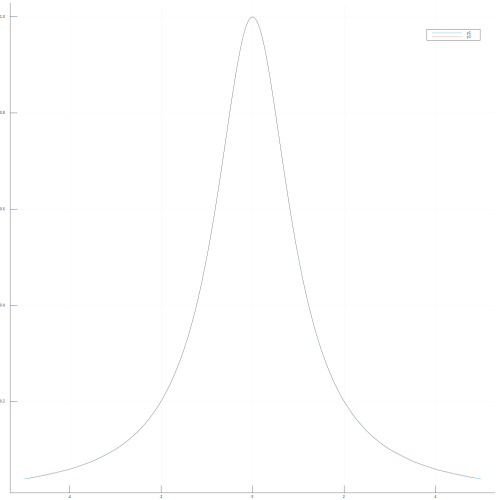

In [63]:
#20 Points Plot
using Interpolations
using Plots
f(x)=1/(1+x^2)
xs=-5:(10/20):5
A = [f(x) for x in xs]
interp_cubic = CubicSplineInterpolation(xs, A)
xi=-5:0.01:5
yi1=interp_cubic(xi)
plot(xi,yi,size = (2000,2000))
plot!(f,-5,5)

In [76]:
#20 Points Error
vecnorm(f.(xi))-vecnorm(yi1)

0.0018855829761843523

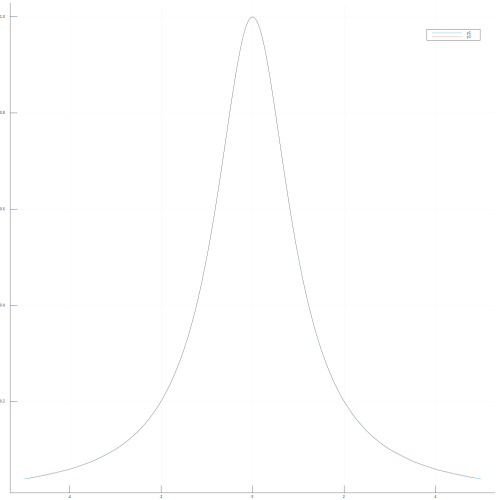

In [70]:
#100 Points
using Interpolations
using Plots
f(x)=1/(1+x^2)
xs=-5:(10/100):5
A = [f(x) for x in xs]
interp_cubic = CubicSplineInterpolation(xs, A)
xi=-5:0.01:5
yi2=interp_cubic(xi)
plot(xi,yi2,size = (2000,2000))
plot!(f,-5,5)

In [75]:
#100 Points Error
vecnorm(f.(xi))-vecnorm(yi2)

2.5375500900537418e-6

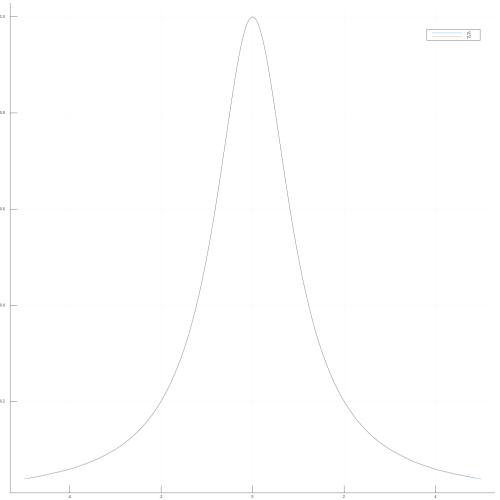

In [72]:
#200 Points
using Interpolations
using Plots
f(x)=1/(1+x^2)
xs=-5:(10/200):5
A = [f(x) for x in xs]
interp_cubic = CubicSplineInterpolation(xs, A)
xi=-5:0.01:5
yi3=interp_cubic(xi)
plot(xi,yi3,size = (2000,2000))
plot!(f,-5,5)

In [74]:
#200 Points Error
vecnorm(f.(xi))-vecnorm(yi3)

1.4889227095693514e-7

## Problem 2
(2 points)

Find the cubic best approximation (_e.g.,_ minimax approximation) to Runge's function on $[-1,1]$.  Plot your approximation against the true solution.  Compute the 2-norm error for the test points $\texttt{xi = -1:0.001:1}$.  This problem will likely require both analytical calculations and Julia computations.  Use markdown and code cells as appropriate.

$$E(\rho_n(f)) \leq \frac{\left( \frac{b-a}{2} \right)^{n+1} }{(n+1)! 2^n} \ \max_{a\leq x \leq b} \left| f^{(n+1)}(x) \right|$$

In [38]:
n=3 #cubic approximation
a=-1
b=1
RHS1 = (((b-a)/2)^(n+1))/(factorial((n+1))*2^n)
f4(x) = 24(5x^4-10x^2+1)/(x^2+1)^5

f4 (generic function with 1 method)

In [39]:
p=f4(1)
g=f4(-1)
h=f4(0)

display(p)
display(g)
display(h)

-3.0

-3.0

24.0

In [40]:
RHS2=24
RHS=RHS1*RHS2

0.125

$$E(\rho_3(f)) \leq \frac{1}{8}$$

In [44]:
using Polynomials
x1 = -1.
x2 = -1./3.
x3 = 1/3
x4 = 1
y1 = f(x1)
y2 = f(x2)
y3 = f(x3)
y4 = f(x4)
L1 = poly([x2, x3, x4])./( (x1-x2)*(x1-x3)*(x1-x4) )
L2 = poly([x1, x3, x4])./( (x2-x1)*(x2-x3)*(x2-x4) )
L3 = poly([x1, x2, x4])./( (x3-x2)*(x3-x1)*(x3-x4) )
L4 = poly([x1, x2, x3])./( (x4-x2)*(x4-x3)*(x4-x1) )
p3 = y1*L1 + y2*L2 + y3*L3 + y4*L4

Poly(0.9499999999999998 - 2.185751579730777e-16*x - 0.4499999999999996*x^2 + 2.220446049250313e-16*x^3)

In [84]:
using Plots
plot(f,-5,5,size=(2000,2000))
plot!(xi,p3(xi))

$$E(p_4) = \max_{-1\leq x \leq 1} \left| f(x)-p_4(x) \right| \equiv \max_{-1\leq x \leq 1} |g(x)|$$

In [93]:
max(x) = f(x)-p3(x)
Ep3=max(0)

0.050000000000000155

In [90]:
#2 Norm Error -1 to 1
xe=-1:0.001:1
vecnorm(f.(xe))-vecnorm(p3(xe))

-0.42422272563446484

## Problem 3

(2 points)

Find the cubic least squares approximation to Runge's function on $[-1,1]$.  Plot your approximation against the true solution.  Compute the 2-norm error for the test points $\texttt{xi = -1:0.001:1}$.  This problem will likely require both analytical calculations and Julia computations.  Use markdown and code cells as appropriate. You may use whatever symbolic math software you wish to evaluate the integrals in the least squares coefficients.

$$E(p;f) \equiv \sqrt{\frac{1}{b-a}\left(\int_a^b (f(x) - p(x))^2 \ dx\right)}$$

Mathematically, we want <p>
    
$$\min_{\alpha_0,\alpha_1, \alpha_2, \alpha_3} g(\alpha_0,\alpha_1, \alpha_2, \alpha_3)$$

where <p>
    
$$g(\alpha_0,\alpha_1, \alpha_2, \alpha_3) = \int_{-1}^1 (e^x - \alpha_0 - \alpha_1 x - \alpha_2 x^2 - \alpha_3 x^3)^2 \ dx$$

We can use brute force to find the minimum, or solve for <p>
    
$$\frac{\partial g}{\partial \alpha_0} = 0, \qquad \frac{\partial g}{\partial \alpha_1} = 0, \qquad \frac{\partial g}{\partial \alpha_2} = 0, \qquad \frac{\partial g}{\partial \alpha_3} = 0$$

by passing derivatives through the integral.<p>

$$\frac{\partial g}{\partial \alpha_0}=\int_{-1}^1 \frac{\partial}{\partial \alpha_0}[(\frac{1}{1+x^2} - \alpha_0 - \alpha_1 x - \alpha_2 x^2 - \alpha_3 x^3)^2 ] \ dx = 0$$

$$ = \frac{12 \alpha_0 + 4 \alpha_2 - 3\pi}{3}$$

$$\frac{\partial g}{\partial \alpha_1}=\int_{-1}^1 \frac{\partial}{\partial \alpha_1}[(\frac{1}{1+x^2} - \alpha_0 - \alpha_1 x - \alpha_2 x^2 - \alpha_3 x^3)^2 ] \ dx = 0$$

$$ = \frac{20 \alpha_1 + 12 \alpha_3}{15}$$

$$\frac{\partial g}{\partial \alpha_2}=\int_{-1}^1 \frac{\partial}{\partial \alpha_2}[(\frac{1}{1+x^2} - \alpha_0 - \alpha_1 x - \alpha_2 x^2 - \alpha_3 x^3)^2 ] \ dx = 0$$

$$ = \frac{20 \alpha_0 + 12 \alpha_2 +15\pi -60}{15}$$

$$\frac{\partial g}{\partial \alpha_3}=\int_{-1}^1 \frac{\partial}{\partial \alpha_3}[(\frac{1}{1+x^2} - \alpha_0 - \alpha_1 x - \alpha_2 x^2 - \alpha_3 x^3)^2 ] \ dx = 0$$

$$ = \frac{28 \alpha_1 +20 \alpha_3}{35}$$

In [104]:
alpha0=0.9623889804
alpha1=0
alpha2=-0.530972451
alpha3=0
p3LS(x)=alpha0+alpha1*x+alpha2*x^2+alpha3*x^3

p3LS (generic function with 1 method)

In [105]:
a=-1
b=1
integralfxpx = 0.047606124
Ex = sqrt((1/b-a)*integralfxpx)

0.30856481977049816

In [106]:
using Plots
plot(f,-5,5,size=(2000,2000))
plot!(xi,p3LS.(xi))

In [107]:
#2 Norm Error
vecnorm(f.(xe))-vecnorm(p3LS.(xe))

0.022881666524263267